https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init
import torch.optim as optim

import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

In [2]:
input_size = 10
hidden_size = 9
output_size = 1

seq_length = 2000
train_length = 1800
start = 2
stop = 18
data_time_steps = np.linspace(start, stop, seq_length)
data = np.sin(data_time_steps)
data.resize((seq_length, 1))

# the tensor version
data_t = torch.tensor(data, dtype=torch.float, requires_grad=False)

In [3]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.context_state = torch.nn.Parameter(torch.zeros((1, hidden_size), dtype=torch.float, requires_grad=True))
    self.fc1 = torch.nn.Linear(input_size, hidden_size, bias=True)
    self.fc2 = torch.nn.Linear(hidden_size, 1, bias=True)
        
  def printParams(self):
    print("\nPrinting parameters of Net class")
    for parameter in self.parameters():
      print(parameter)

  def forward(self, input):
    fullinput = torch.cat((input, self.context_state), 1)
    out = torch.tanh(self.fc1(fullinput))
    out = self.fc2(out)
    return (out)

net = Net()

In [4]:
epochs = 50
lr = 0.001
momentum=0.9

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
# optimizer = optim.Adam(net.parameters(), lr=lr)
    
for i in range(epochs):

  running_loss = 0
  #net.printParams()
  
  for j in range(train_length):
    input = data_t[j:(j+1)]
    target = data_t[j+1:(j+2)] # prediction is the next entry in data_t
    
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    (pred) = net(input)

    loss = criterion(pred, target)
    loss.backward()
    optimizer.step()
   
    running_loss += loss.item()
    
  if i % 10 == 0:
    print(f"Epoch: {i} loss {running_loss}")

Epoch: 0 loss 61.729067766364096
Epoch: 10 loss 0.10775524368052847
Epoch: 20 loss 0.10391359585004356
Epoch: 30 loss 0.10080415767632363
Epoch: 40 loss 0.09817605683578529


In [5]:
predictions = []

for i in range(train_length):
  input = data_t[i:i+1]
  pred = net(input)
  predictions.append(pred.data.numpy().ravel()[0])

# feeding its own predictions.
for i in range(seq_length-train_length):
  input = torch.tensor(predictions[-1], dtype=torch.float, requires_grad=False).unsqueeze(0).unsqueeze(0)    
  pred = net(input)
  predictions.append(pred.data.numpy().ravel()[0])

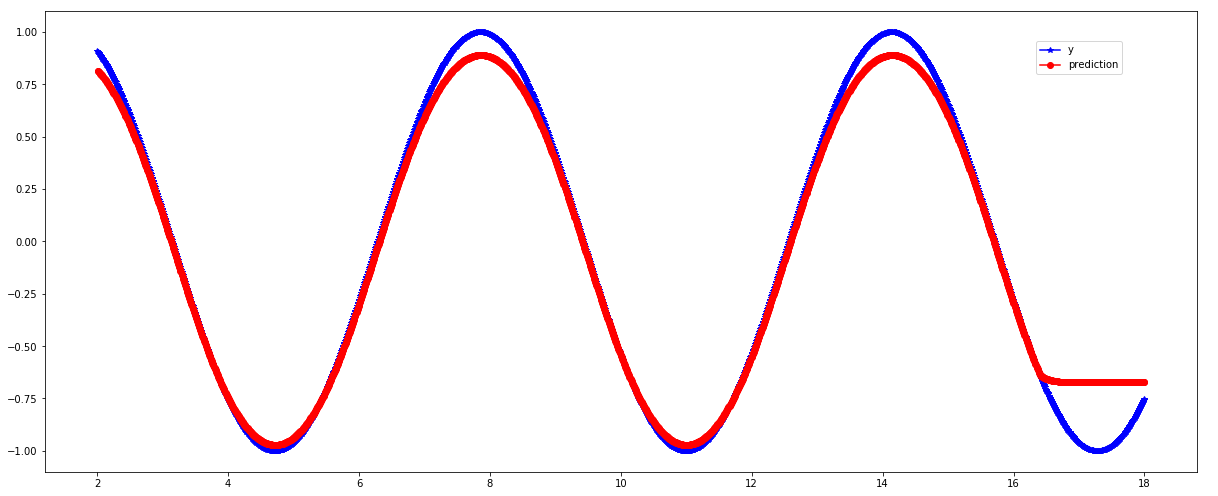

In [97]:
fig = plt.figure(figsize=(20,8))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

see_last=seq_length
# see_last=150
axes.plot(data_time_steps[-see_last:], data_t.numpy()[-see_last:], marker="*", color="blue", label="y")
axes.plot(data_time_steps[(-see_last+1):], predictions[-see_last:-1], marker="o", color="red", label="prediction")
fig.legend(loc=(0.85,0.85))

In [13]:
# output_file("line.html")
output_notebook()

p = figure(plot_width=900, plot_height=400)

# add a line renderer
p.line(x=data_time_steps, y=data_t.numpy().squeeze(1), line_width=2, line_color="blue")
p.line(x=data_time_steps[1:], y=predictions[:-1], line_width=2, line_color="orange")

show(p)

Loading BokehJS ...